Clustering with K-Means

 1.Load and visualize dataset (optional PCA for 2D view).

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


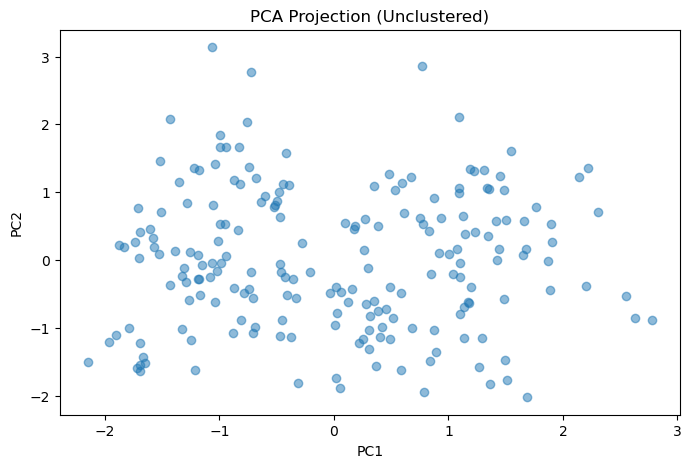

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load dataset
data = pd.read_csv("Mall_Customers.csv")
print(data.head())

# Optional: Encode catogorical variables
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Features for clustering
x = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Scale data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Optional: PCA for 2D visualization
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(x_pca[:, 0], x_pca[:, 1], alpha=0.5)
plt.title("PCA Projection (Unclustered)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

 2.Fit K-Means and assign cluster labels.

In [7]:
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(x_scaled)
data['Cluster'] = labels

d:\Users\Shreyas Meru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 3.Use the Elbow Method to find optimal K.

d:\Users\Shreyas Meru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Users\Shreyas Meru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Users\Shreyas Meru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Users\Shreyas Meru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to 

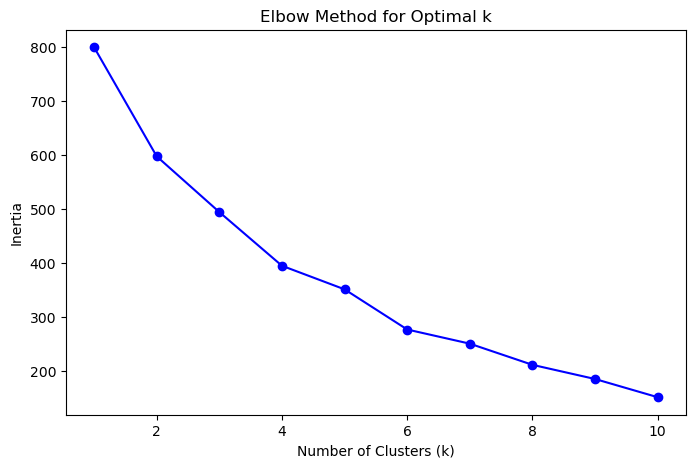

In [9]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


 4.Visualize clusters with color-coding.

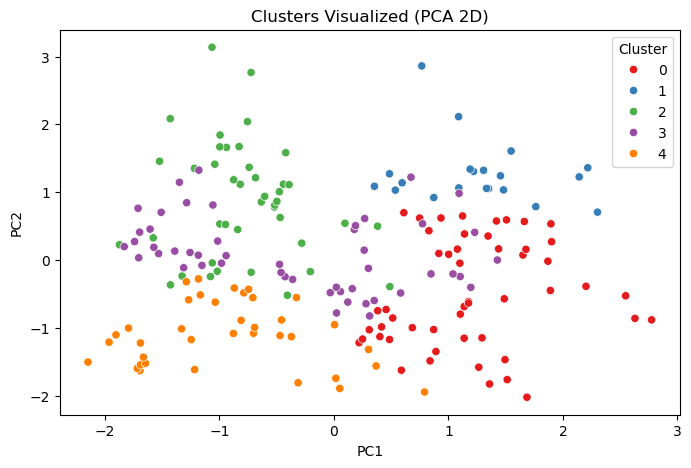

In [10]:
# Use PCA-reduced data for 2D visualization
plt.figure(figsize=(8, 5))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=labels, palette='Set1')
plt.title("Clusters Visualized (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Cluster')
plt.show()

 5.Evaluate clustering using Silhouette Score.

In [11]:
sil_score = silhouette_score(x_scaled, labels)
print(f"Silhouette Score: {sil_score:.3f}")

Silhouette Score: 0.272
